In [1]:
! pip install pymc3 --upgrade

Requirement already up-to-date: pymc3 in /usr/local/lib/python3.6/dist-packages (3.9.3)


In [2]:
! pip install arviz


Bayesian prior beliefs act as regularization from making inference from the data

### Excercise 1 - Fitting a Normal distribution

1. Generate data drawn from Normal distribution
2. Fit a model to this data and estimate the parameters (mean & std) of this distribution






In [3]:
import pymc3 as pm
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [4]:
# Generate data from normal distribution with mean=0.5 & std=0.35
data = scipy.stats.norm(loc=0.5, scale=0.35).rvs(1000)

In [5]:
data.shape

(1000,)

#### Estimating parameters of the data generated above.

Since standard deviation is a positive value,we use Half-normal distribution for std since its range is [0,inf].

In [6]:
# Instantiate model with context. This model computes Log-likelihood and its gradients
n_post_samples = 1000

with pm.Model() as model:
  # Define priors for model parameters
  mu = pm.Normal('mu', mu=0.0, sd=0.5)
  std = pm.HalfNormal('std', sd=0.5)
  
  # Likelihood function. Use observed data to compute likelihood
  y = pm.Normal('y', mu=mu, sd=std, observed=data)
  
  # Get posterior samples from NUTS sampler
  trace = pm.sample(n_post_samples)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [std, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


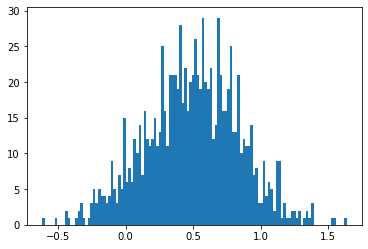

In [7]:
plt.hist(data, histtype='stepfilled', bins=120)
plt.show()

In [8]:
trace['mu'].shape

(2000,)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


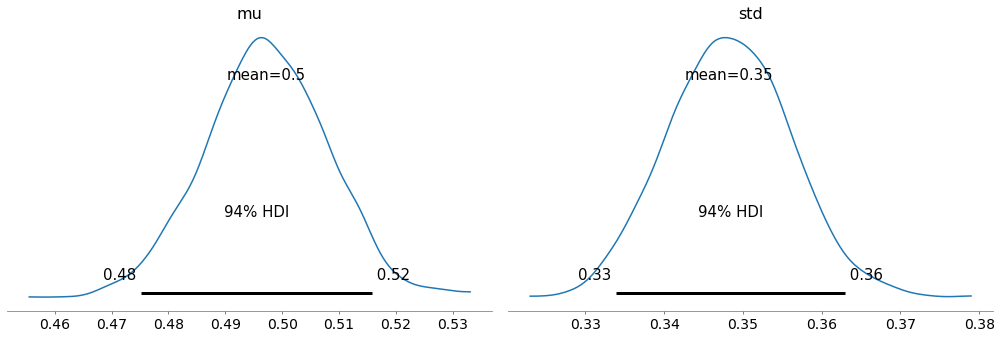

In [11]:
pm.plot_posterior(trace)
plt.show()

In [12]:
# Estimates of parameters mu & std from the posterior samples of the fitted model

trace['mu'].mean(), trace['std'].mean()

(0.49726704003022826, 0.3482576656808353)

### References 
* https://www.youtube.com/watch?v=j5QyTDUww6U&t=1520s